In [442]:
using Random, Distributions, Plots

In [443]:
mutable struct Individual
    chromosome::Float64
end
function normal_dist(x, m, v)
    return 1 / (v * sqrt(2 * π)) * exp(-(x - m)^2 / (2 * v^2))
end

function objective_function(x)
    return 5 - 24 * x + 17 * x^2 - 11 / 3 * x^3 + 1 / 4 * x^4
end
function CMA_ES(objective_function, max_iter=5, start_mean=7, start_std=1.0, sample_size=5, lr=0.1)
    # Инициализация начального распределения
    vmean = start_mean
    logvstd = log1p(start_std^2-1)
    g_best_value = Inf
    g_best_sample = randn() * exp(logvstd) + vmean
    hist = []
    hist_param = []
    hist_elite = []
    for iter in 1:max_iter
        g_samples = [Individual(randn() * exp(logvstd) + vmean) for _ in 1:sample_size]
        values = [objective_function(sample.chromosome) for sample in g_samples]
        # elite_samples = g_samples[sortperm(values)[1:floor(Int, sample_size * elite_fraction)]]
        push!(hist_param, [vmean, exp(logvstd)])
        push!(hist_elite, [sample.chromosome for sample in g_samples])
        pred_mean = vmean
        pred_std = exp(logvstd)
        vmean -= lr * 1 / length(g_samples) * sum([objective_function(sample.chromosome) * (sample.chromosome - pred_mean) for sample in g_samples])
        logvstd -= lr * 1 / length(g_samples) / 2 * sum([objective_function(sample.chromosome) * ((sample.chromosome - pred_mean)^2/pred_std^2 - 1) for sample in g_samples])
        println(vmean, " ", exp(logvstd))
        best_value = minimum(values)
        best_sample = g_samples[argmin(values)].chromosome
        if g_best_value > best_value
            g_best_value = best_value
            g_best_sample = best_sample
        end
        push!(hist, best_sample)

        println("Iteration $iter: Best value = $best_value,")
    end

    return g_best_sample, hist, hist_param, hist_elite
end
start_std = 1.2
start_mean = 6
g_best_sample, hist, hist_param, hist_elite = CMA_ES(objective_function, 30, start_mean, start_std, 50, 0.1)


2.987385237338278 0.363521985118248
Iteration 1: Best value = 5.012264947153369,
2.9195228523690173 0.34617417098815795
Iteration 2: Best value = 2.487931360689281,
2.8471554047945062 0.3581945504251386
Iteration 3: Best value = 1.5923184731798585,
2.7628473622563434 0.3523895471725955
Iteration 4: Best value = 0.09662879806353875,
2.6584374074433814 0.3329193652007984
Iteration 5: Best value = -0.21898965772926804,
2.557106965144913 0.33841794132672154
Iteration 6: Best value = -3.6848133873859217,
2.4791522130712584 0.34040900243979283
Iteration 7: Best value = -1.0671777700570533,
2.40414629399672 0.35479372871748655
Iteration 8: Best value = -2.425058885443018,
2.3381888708030156 0.3815709769875038
Iteration 9: Best value = -3.8907282023320975,
2.2204256387166903 0.4007215770190176
Iteration 10: Best value = -3.8128251085917118,
2.0608422949479848 0.40196477586804186
Iteration 11: Best value = -4.918620384717026,
1.9522779182017755 0.3998216331005419
Iteration 12: Best value = -4.8

(1.0004443062946466, Any[5.949886058729769, 2.3458773115416025, 2.236376206747828, 2.053420058472758, 2.014268115907808, 1.5304070286791742, 1.9070189533308355, 1.7245117925408542, 1.4944044606838416, 1.5082291004517612  …  1.00993768616934, 1.000714498052366, 0.9886742495083095, 1.0233331248511073, 1.0013834701457025, 1.0004443062946466, 1.0043774526813076, 0.989252208914909, 0.9975734950949812, 0.9991462982540675], Any[[6.0, 1.44], [2.987385237338278, 0.363521985118248], [2.9195228523690173, 0.34617417098815795], [2.8471554047945062, 0.3581945504251386], [2.7628473622563434, 0.3523895471725955], [2.6584374074433814, 0.3329193652007984], [2.557106965144913, 0.33841794132672154], [2.4791522130712584, 0.34040900243979283], [2.40414629399672, 0.35479372871748655], [2.3381888708030156, 0.3815709769875038]  …  [1.2963870616429343, 0.31355161429008876], [1.2665660331530004, 0.28573087101945815], [1.2521810346321043, 0.27988445852642474], [1.254565072281162, 0.2660124623602299], [1.267671647

[ Info: Saved animation to /home/andrey/work/Optimization/lab15/anim_fps15.gif


Plots.AnimatedGif("/home/andrey/work/Optimization/lab15/anim_fps15.gif")
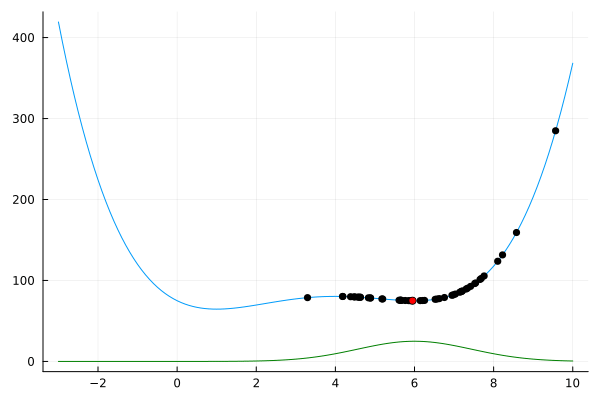

In [448]:
up = 70
x_min, x_max = -3, 10
anim = @animate for i in 1:length(hist)
    plot([x for x ∈ x_min:0.1:x_max], [objective_function(x)+up for x ∈ x_min:0.1:x_max])
    for h ∈ hist_elite[i]
        if x_min <= h <= x_max
            scatter!([h], [objective_function(h)+up], color=RGB(0, 0, 0), legend=false)
        end
    end
    scatter!([hist[i]], [objective_function(hist[i])+up], color=:red)
    plot!([x for x ∈ x_min:0.1:x_max], [90*normal_dist(x, hist_param[i][1], hist_param[i][2]) for x ∈ x_min:0.1:x_max], color=:green)
end
gif(anim, "anim_fps15.gif", fps = 15)

In [445]:
# plot([i for i ∈ 0:0.1:10], [objective_function(i) for i ∈ 0:0.1:10])
# scatter!([h for h ∈ hist], [objective_function(h) for h ∈ hist])
# scatter!([hist[end]], [objective_function(hist[end])])